In [2]:
import glob
from typing import Dict
import numpy as np

from model_training.cnn_classifier import CNNClassifier
from model_training.architectures.simple_convolution_network import SimpleConvolutionArchitecture

In [5]:
from model_training.measures import summary, get_true_and_predicted_labels

In [9]:
import pandas as pd

In [13]:
import os

In [3]:
ARCHITRECTURE = SimpleConvolutionArchitecture()
FOLDER_PATH = "../models/simple_CNN__spectrograms_cleaned_augmented"
DATASET = "../data/tsrc_spectrograms_cleaned_augmented"

In [14]:
CLASS_LABELS = os.listdir(f"{DATASET}/train")

In [4]:
model = CNNClassifier(FOLDER_PATH, architecture=ARCHITRECTURE)
model.fit(
    f"{DATASET}/train", 
    f"{DATASET}/validation",
    batch_size=32,
    n_epochs=10,
)

Running training on GPU...


 10%|████████                                                                        | 1/10 [14:07<2:07:04, 847.18s/it]

Epoch 0 Done after 847.1809139251709 seconds


 20%|████████████████                                                                | 2/10 [23:33<1:30:54, 681.80s/it]

Epoch 1 Done after 566.0217068195343 seconds


 30%|████████████████████████                                                        | 3/10 [34:33<1:18:23, 671.96s/it]

Epoch 2 Done after 660.2554020881653 seconds


 40%|████████████████████████████████                                                | 4/10 [45:33<1:06:42, 667.14s/it]

Epoch 3 Done after 659.7354712486267 seconds


 50%|█████████████████████████████████████████                                         | 5/10 [56:43<55:40, 668.16s/it]

Epoch 4 Done after 669.9648430347443 seconds


 60%|████████████████████████████████████████████████                                | 6/10 [1:07:42<44:20, 665.03s/it]

Epoch 5 Done after 658.9483759403229 seconds


 70%|████████████████████████████████████████████████████████                        | 7/10 [1:19:02<33:29, 669.99s/it]

Epoch 6 Done after 680.2104375362396 seconds


 80%|████████████████████████████████████████████████████████████████                | 8/10 [1:30:22<22:26, 673.19s/it]

Epoch 7 Done after 680.0326759815216 seconds


 90%|████████████████████████████████████████████████████████████████████████        | 9/10 [1:42:00<11:20, 680.84s/it]

Epoch 8 Done after 697.6723613739014 seconds


 90%|████████████████████████████████████████████████████████████████████████        | 9/10 [1:53:20<12:35, 755.66s/it]

Epoch 9 Done after 680.9049317836761 seconds
Validation score increased five times in a row. Early stopping...
Finished Training


In [7]:
y_true, y_pred = get_true_and_predicted_labels(model, f"{DATASET}/test")

In [10]:
df = pd.DataFrame({'y_true' : y_true, "y_pred" : y_pred })
df.to_csv(f"{FOLDER_PATH}/predictions.csv", index=False)

Accuracy: 0.8487323726593203
Micro F1 Score: 0.8487323726593202
Macro F1 Score: 0.8506563297307286
Weighted F1 Score: 0.8493665570781971


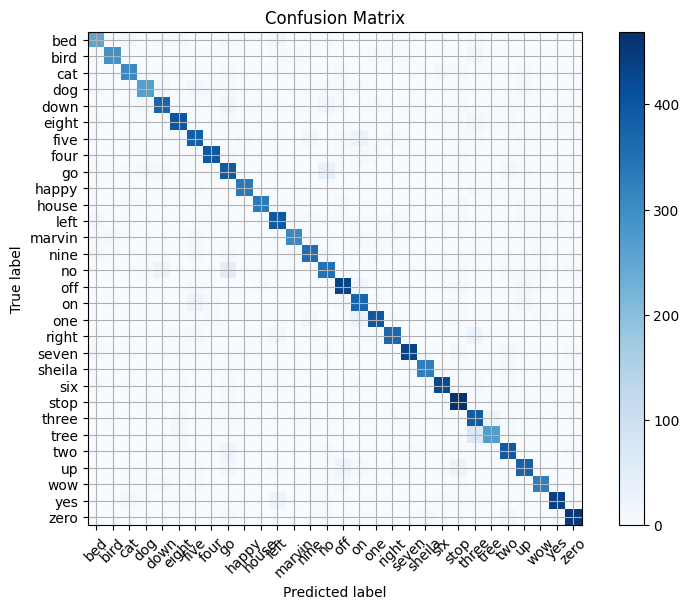

In [16]:
df = pd.read_csv(f"{FOLDER_PATH}/predictions.csv")
y_true = df["y_true"].values
y_pred = df["y_pred"].values
summary = summary(y_true, y_pred, CLASS_LABELS)